In [1]:
import numpy as np
import sys
import seaborn as sns
import matplotlib.pyplot as plt

from evaluation.visualize import plot_dir_far_scores, plot_tar_far_scores

In [2]:
def draw_score_distr_plot(
    scores_distr, score_type, model_name, in_data_name, out_data_name
):
    sns.set_theme()
    plt.figure(figsize=(12, 8))
    sns.distplot(
        scores_distr[in_data_name],
        kde=True,
        norm_hist=True,
        hist=True,
        label=in_data_name,
    )
    sns.distplot(
        scores_distr[out_data_name],
        kde=True,
        norm_hist=True,
        hist=True,
        label=out_data_name,
    )

    # plt.title(
    #     f"Распределение косинусной схожести для совпадающих и несовпадающих пар изображений"
    # )
    plt.xlabel(f"Косинусная схожесть")

    plt.legend()

In [3]:
a = np.load(
    "/app/outputs/ijb_evals/ijb_evals_2023-06-06_12-26-35/IJBC_CosineSim_det_score.npz"
)

In [4]:
true_match_scores = a["scores"][0, :][a["label"] == 1]
wrong_match_scores = a["scores"][0, :][a["label"] == 0]

### TAR@FAR кривая

In [5]:
fars_cal = [10**ii for ii in np.arange(-5, 0, 4 / 100)] + [1]
threshes, recalls = [], []
wrong_match_scores_sorted = np.sort(wrong_match_scores)[::-1]
for far in fars_cal:
    thresh = wrong_match_scores_sorted[
        max(int((wrong_match_scores_sorted.shape[0]) * far) - 1, 0)
    ]
    recall = np.sum(true_match_scores > thresh) / true_match_scores.shape[0]
    threshes.append(thresh)
    recalls.append(recall)

/tmp/ipykernel_54537/292318331.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


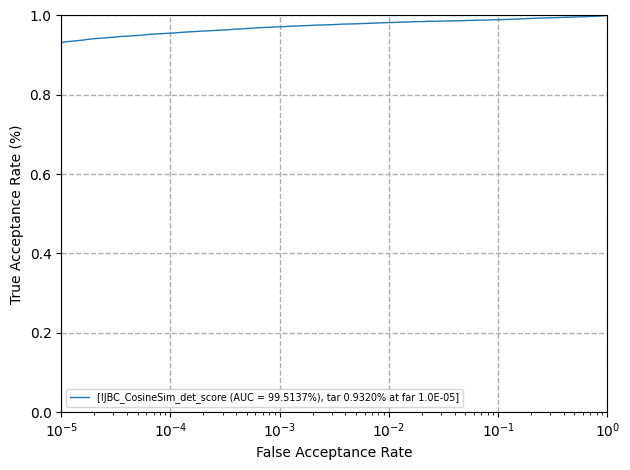

In [6]:
method_names = a["names"]
method_scores = [[fars_cal, recalls]]
fig = plot_tar_far_scores(scores=method_scores, names=method_names)
fig.show()

In [7]:
method_names

array(['IJBC_CosineSim_det_score'], dtype='<U24')

In [8]:
for id, score in enumerate(method_scores):
    name = None if method_names is None else method_names[id]
    if isinstance(score, str) and score.endswith(".npz"):
        aa = np.load(score)
        score, name = aa.get("scores")[0], aa.get("names")[0]

/home/erlygin/miniconda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/erlygin/miniconda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


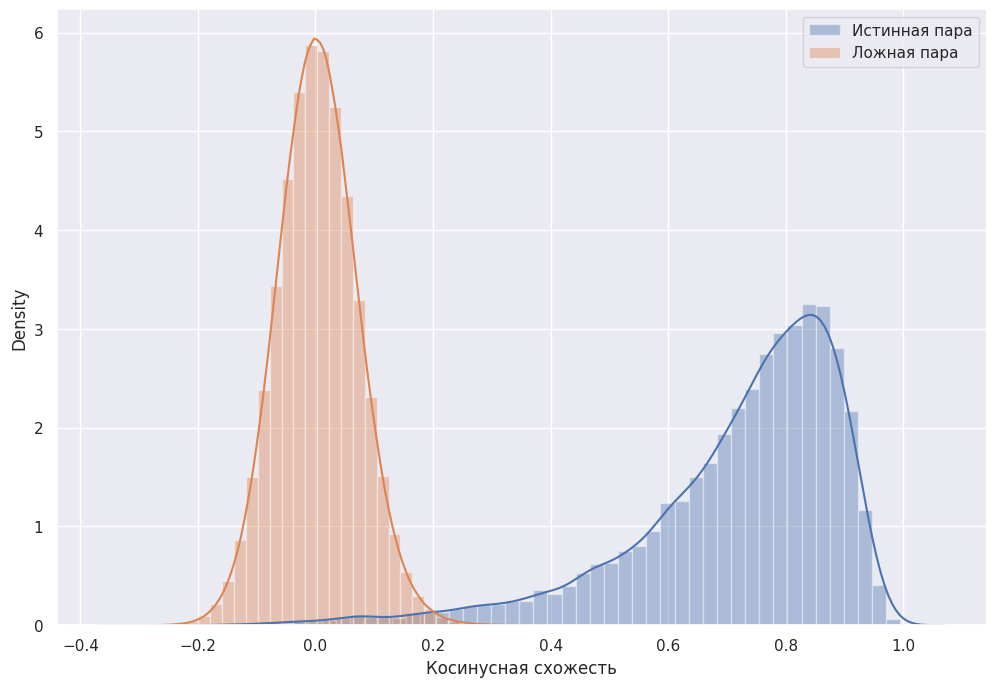

In [9]:
scores_distr = {
    "Истинная пара": true_match_scores,
    "Ложная пара": wrong_match_scores,
}

draw_score_distr_plot(
    scores_distr=scores_distr,
    score_type="EVM",
    model_name="EVM",
    in_data_name="Истинная пара",
    out_data_name="Ложная пара",
)